# Read Iris Dataset

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

!pip install joypy
import joypy

import statsmodels.api as sm
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import make_scorer,accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,r2_score
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.svm import SVC, LinearSVC

from xgboost import XGBClassifier
import optuna
from mlxtend.plotting import plot_decision_regions

from warnings import simplefilter
simplefilter("ignore")

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/iris-flower-dataset/IRIS.csv


In [2]:
iris = pd.read_csv('/kaggle/input/iris-flower-dataset/IRIS.csv')

In [3]:
iris.head().style.format("{:.15}").background_gradient(cmap=plt.get_cmap('Reds'),axis=0)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
print('The dataset has {} rows and {} columns.'.format(iris.shape[0],iris.shape[1]))

The dataset has 150 rows and 5 columns.


In [5]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
print(f'{iris.duplicated().sum()} Duplicated')
iris = iris.drop_duplicates()

iris.shape

3 Duplicated


(147, 5)

In [7]:
iris.describe().style.format("{:.4}").background_gradient(cmap=plt.get_cmap('Reds'),axis=0)

,sepal_length,sepal_width,petal_length,petal_width
count,147.0,147.0,147.0,147.0
mean,5.856,3.056,3.78,1.209
std,0.8291,0.437,1.759,0.7579
min,4.3,2.0,1.0,0.1
25%,5.1,2.8,1.6,0.3
50%,5.8,3.0,4.4,1.3
75%,6.4,3.3,5.1,1.8
max,7.9,4.4,6.9,2.5


In [8]:
iris.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

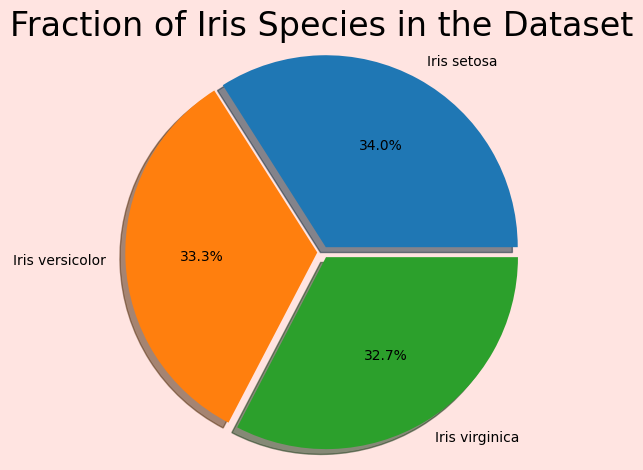

In [9]:
val=iris.species.value_counts()
plt.pie(val,labels=['Iris setosa','Iris versicolor','Iris virginica'],autopct="%1.1f%%",shadow=True,explode=(0.03,0.03,0.03))
plt.axis('equal')
plt.title('Fraction of Iris Species in the Dataset',fontsize=24)

plt.tight_layout()
plt.gcf().patch.set_facecolor('mistyrose')

<Figure size 1000x700 with 0 Axes>

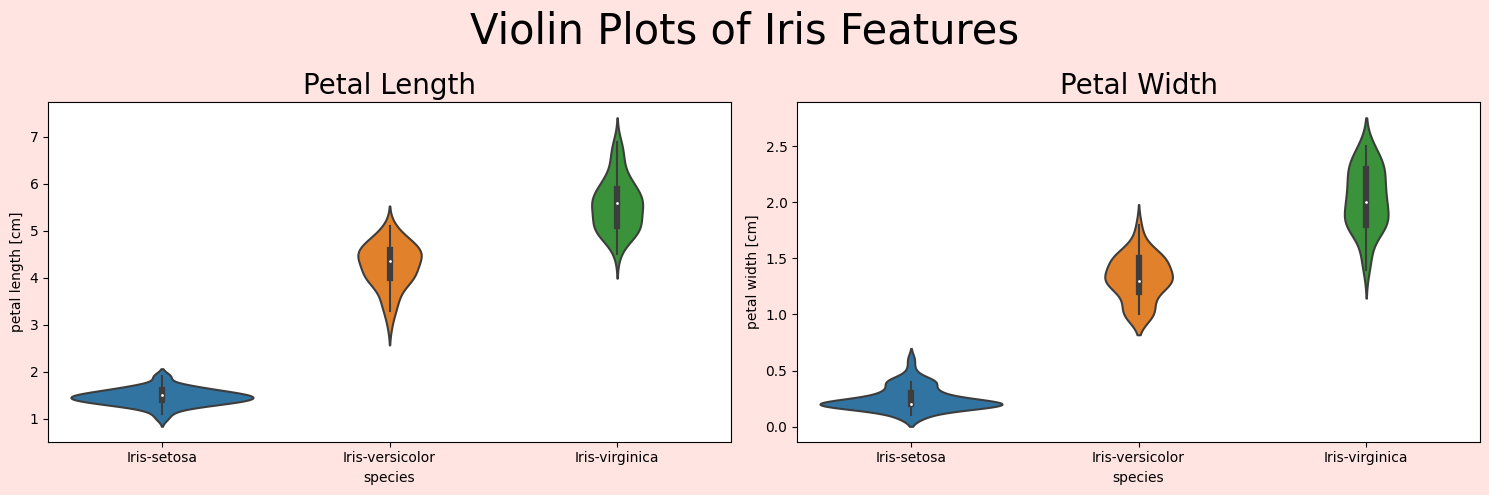

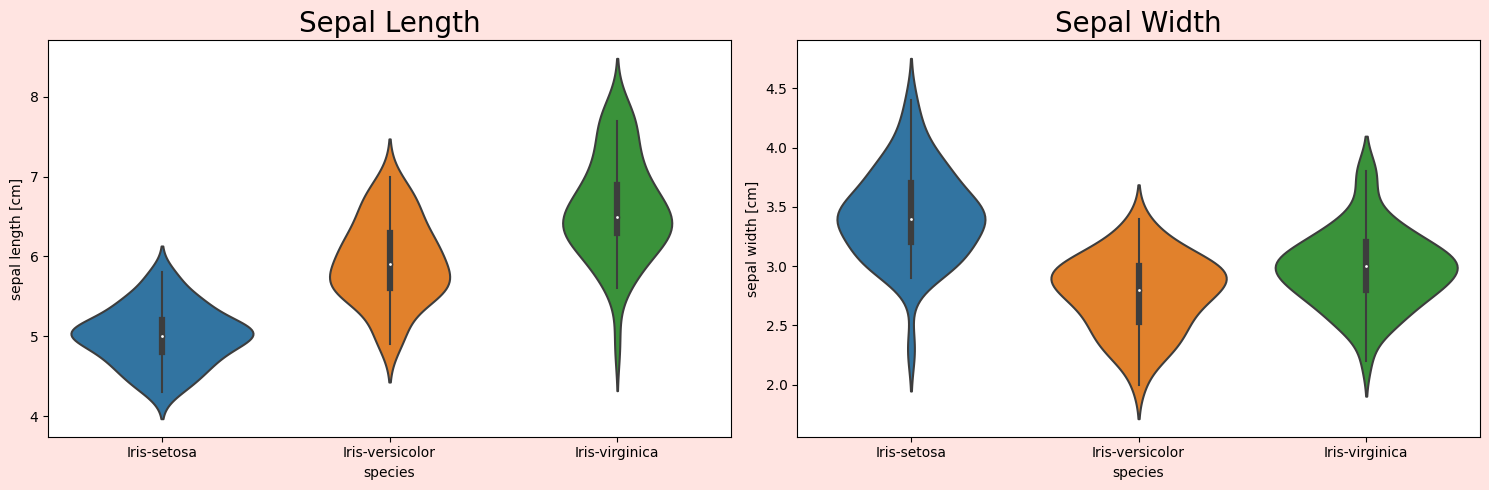

In [10]:
fig = plt.figure(figsize=(10,7));
(topfig,bottomfig) = fig.subfigures(2,1);

topfig.subplots_adjust(left=.1,right=.9,wspace=.4,hspace=.4);
fig,axes = plt.subplots(1,2,figsize=(15,5));
axes[0] = sns.violinplot(x='species',y='petal_length',data=iris,ax=axes[0])
axes[0].set_title('Petal Length',fontsize=20);
axes[0].set_ylabel('petal length [cm]')
axes[1] = sns.violinplot(x='species',y='petal_width',data=iris,ax=axes[1])
axes[1].set_title('Petal Width',fontsize=20);
axes[1].set_ylabel('petal width [cm]')

fig.suptitle("Violin Plots of Iris Features",fontsize=30)
fig.set_facecolor('mistyrose')
plt.tight_layout()

bottomfig.subplots_adjust(left=.1,right=.9,wspace=.4,hspace=.4);
fig,axes = plt.subplots(1,2,figsize=(15,5));
axes[0] = sns.violinplot(x='species',y='sepal_length',data=iris,ax=axes[0])
axes[0].set_title('Sepal Length',fontsize=20);
axes[0].set_ylabel('sepal length [cm]')
axes[1] = sns.violinplot(x='species',y='sepal_width',data=iris,ax=axes[1])
axes[1].set_title('Sepal Width',fontsize=20)
axes[1].set_ylabel('sepal width [cm]')

fig.set_facecolor('mistyrose')
plt.tight_layout()

plt.tight_layout()
plt.show()

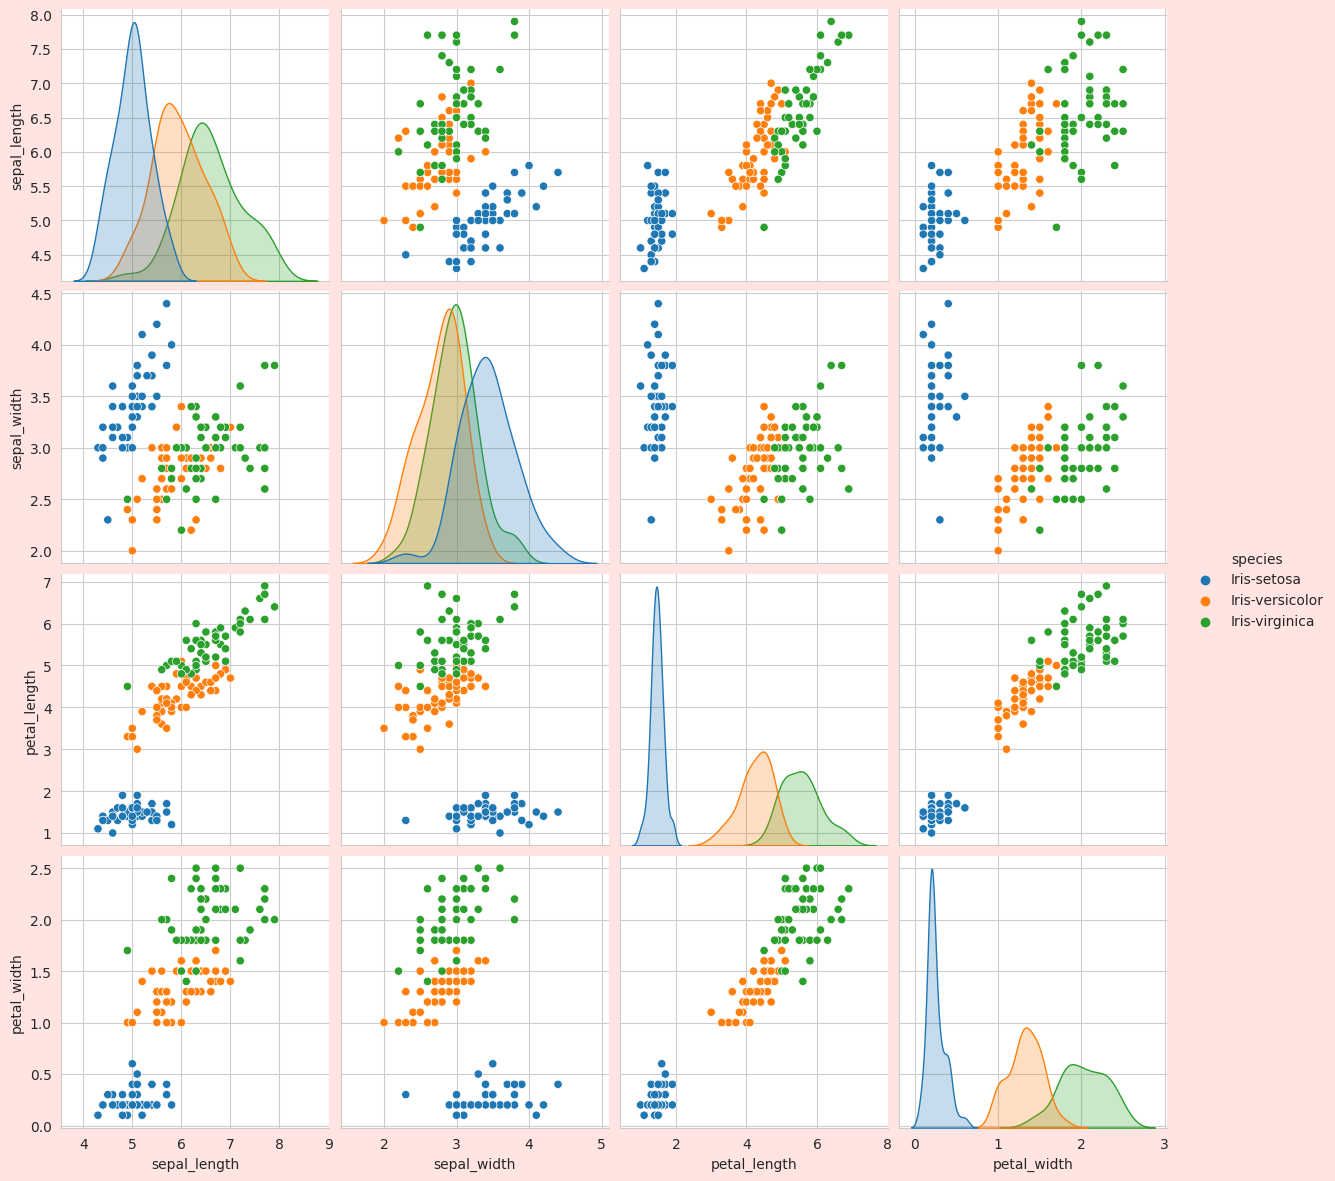

In [11]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",size=3);

plt.gcf().patch.set_facecolor('mistyrose')
plt.show()  

In [13]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# 加载Iris数据集
iris = load_iris()
X = iris.data
y = iris.target

# 将标签进行One-hot编码
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y.reshape(-1, 1))

# 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [44]:
# 构建BP神经网络模型
model = Sequential()
act = 'tanh'
model.add(Dense(10, input_dim=4, activation=act))
model.add(Dense(10, activation=act))
model.add(Dense(10, activation=act))
model.add(Dense(3, activation='softmax'))

# 编译模型
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# 训练模型
model.fit(X_train, y_train, epochs=100, batch_size=5, verbose=1)

# 评估模型
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')

Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2903 - loss: 1.1565   
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3958 - loss: 1.0583 
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6493 - loss: 0.9922 
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7953 - loss: 0.9191 
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8373 - loss: 0.8442 
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8632 - loss: 0.7766 
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8197 - loss: 0.6682 
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8297 - loss: 0.6600 
Epoch 9/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8880 - loss: 0.6251 
Epoch 10/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9452 - loss: 0.6013 
Epoch 11/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8272 - loss: 0.5513 
Epoch 12/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/ste

In [47]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 加载Iris数据集
iris = load_iris()
X = iris.data
y = iris.target

# 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建高斯朴素贝叶斯分类器
gnb = GaussianNB()

# 训练模型
gnb.fit(X_train, y_train)

# 预测
y_pred = gnb.predict(X_test)

# 评估模型
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy:.4f}')
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Test Accuracy: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
